# Cosine Similarity

\begin{align}
Cosine(x,y)= \frac{\sum_{i = 1}^{n}x_i y_i
}{\sqrt{\sum_{i=1}^{n}x_i^2} \sqrt{\sum_{i=1}^{n}y_i^2}}
\end{align}

> ## Cosine Similarity Illustration 1

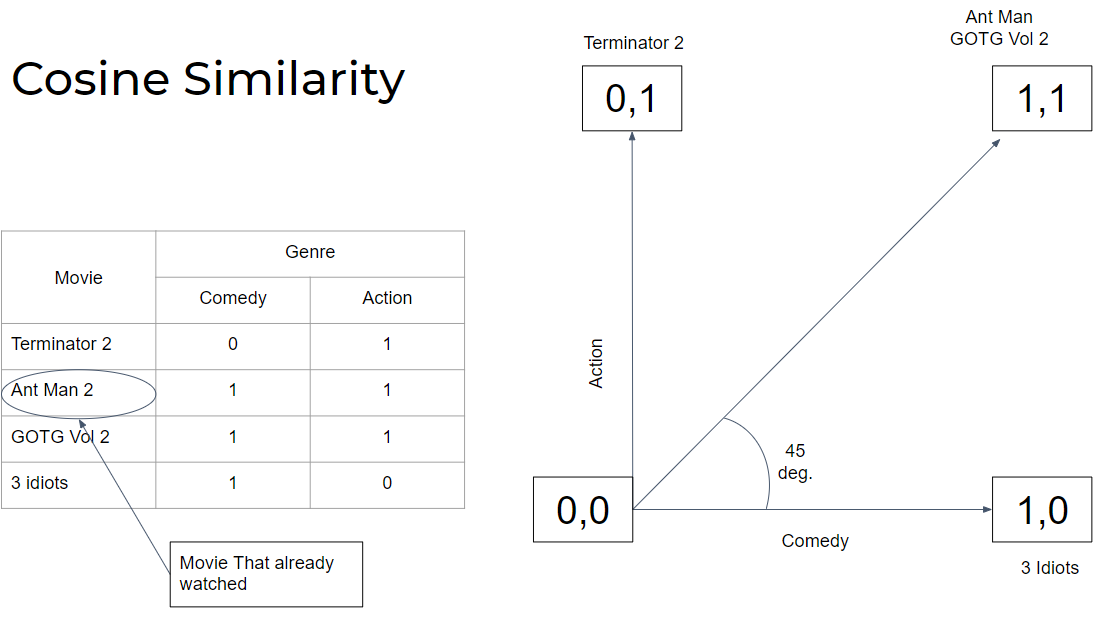

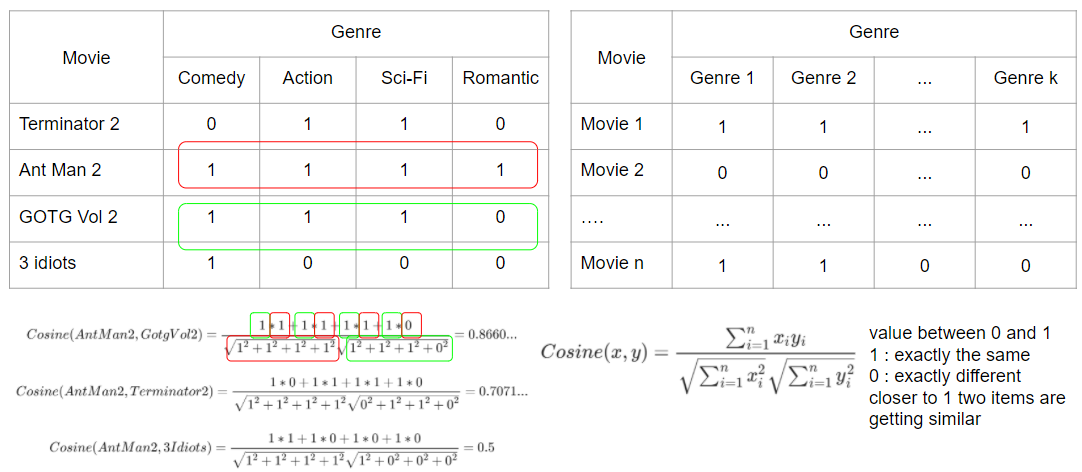

In [1]:
import numpy as np
import pandas as pd

In [2]:
cosine = (1*1+1*1+1*1+1*0)/(np.sqrt(4)*np.sqrt(3))
print(cosine)

0.8660254037844387


In [3]:
cosine = (1*0+1*1+1*1+1*0)/(np.sqrt(4)*np.sqrt(2))
print(cosine)

0.7071067811865475


In [4]:
cosine = (1*1+1*0+1*0+1*0)/(np.sqrt(4)*np.sqrt(1))
print(cosine)

0.5


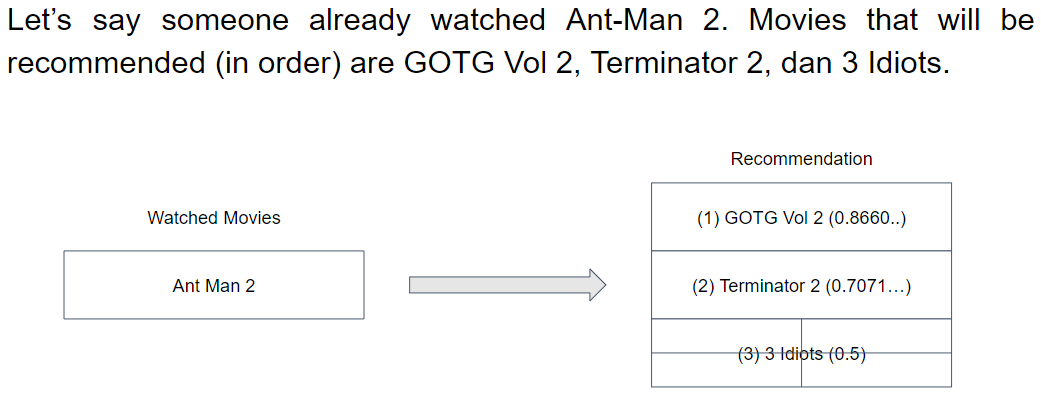

> ## Cosine Similarity Illustration 2

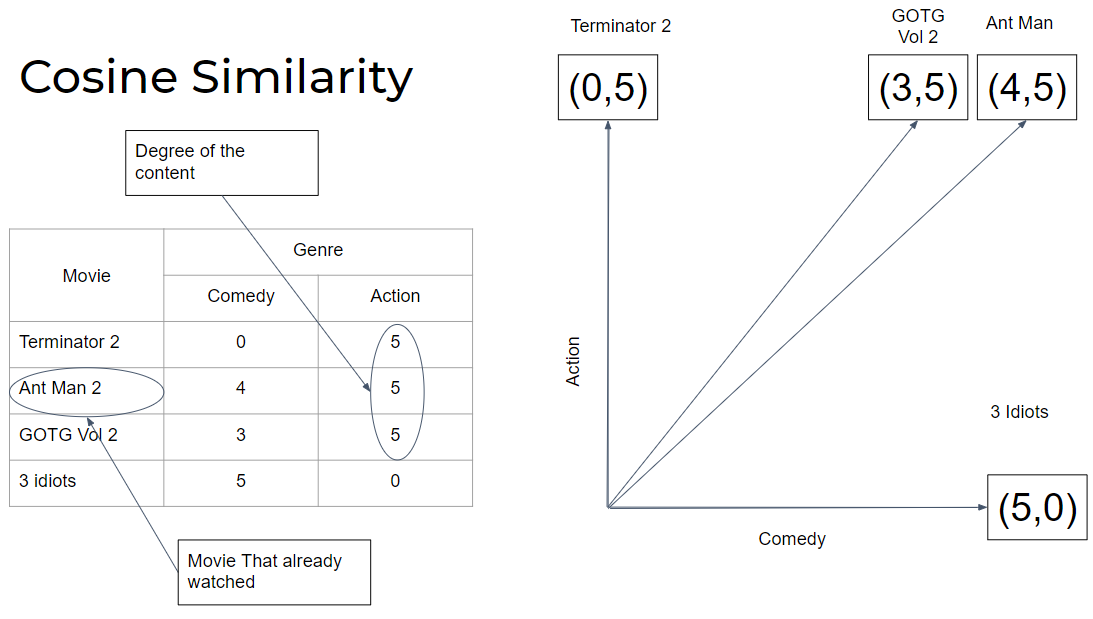

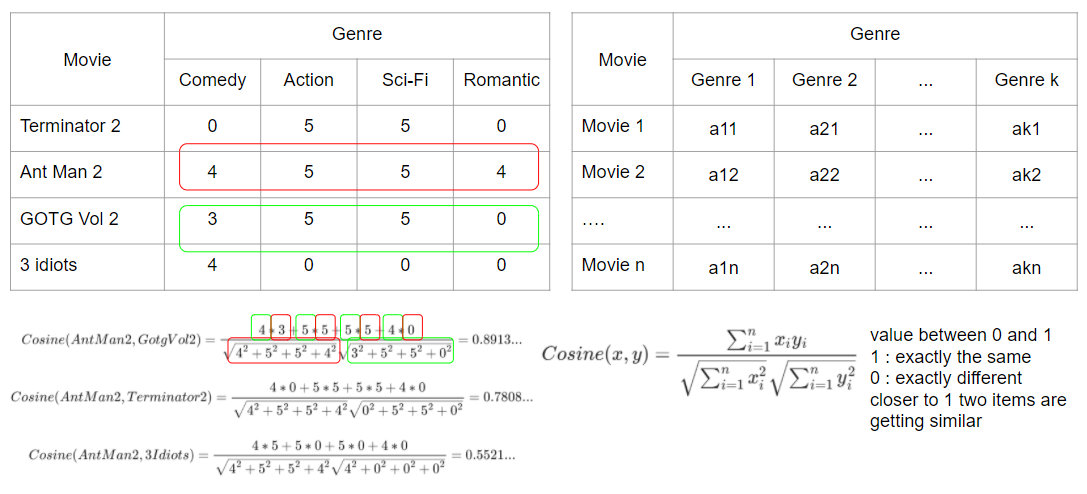

In [5]:
cosine = (4*3+5*5+5*5+4*0)/(np.sqrt(4**2+5**2+5**2+4**2)*np.sqrt(3**2+5**2+5**2+0**2))
print(cosine)

0.891371527293353


In [6]:
cosine = (4*0+5*5+5*5+4*0)/(np.sqrt(4**2+5**2+5**2+4**2)*np.sqrt(0**2+5**2+5**2+0**2))
print(cosine)

0.7808688094430302


In [7]:
cosine = (4*5+5*0+5*0+4*0)/(np.sqrt(4**2+5**2+5**2+4**2)*np.sqrt(4**2+0**2+0**2+0**2))
print(cosine)

0.5521576303742327


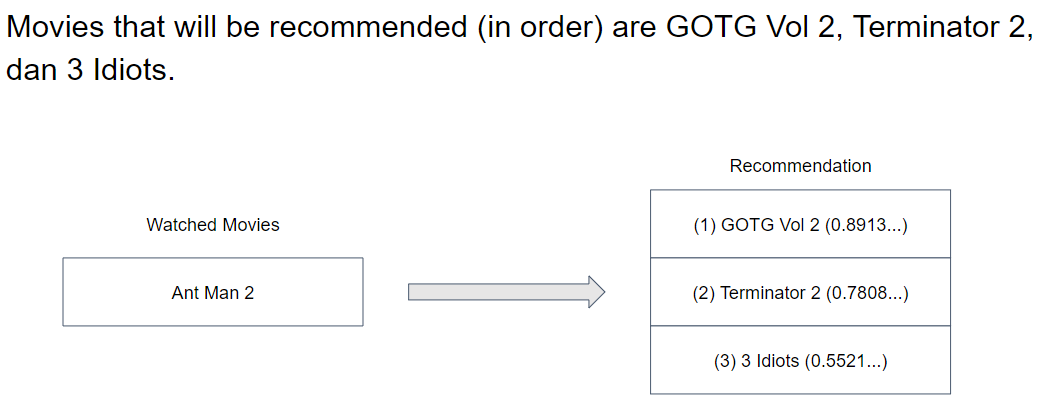

# Content Based Filtering

> ## Content Based Filtering One User

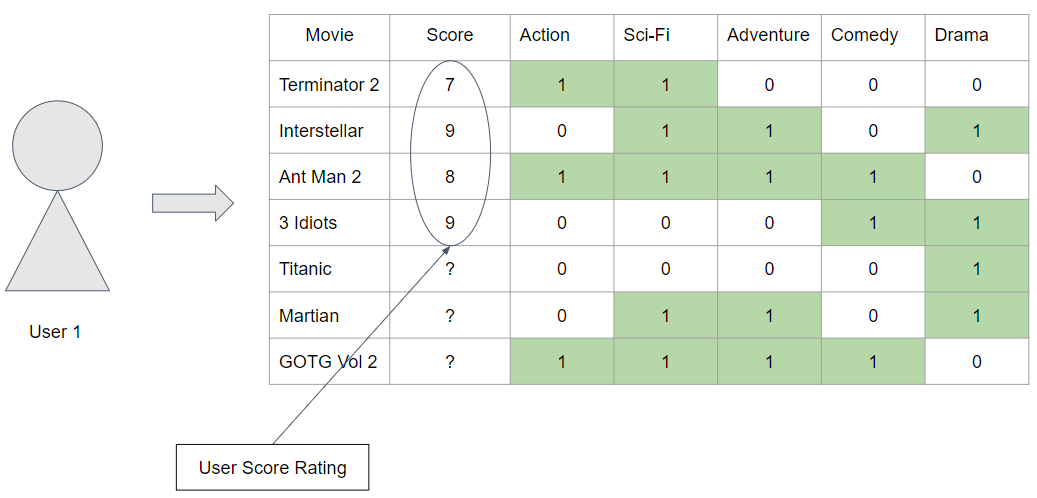

In [8]:
import pandas as pd
import numpy as np

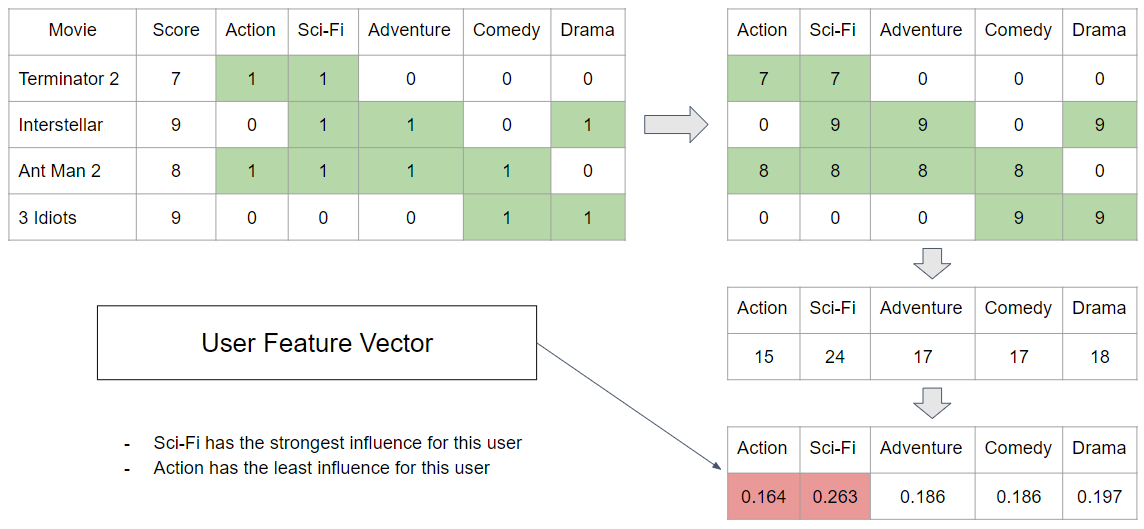

In [9]:
movies = ["Terminator 2","Interstellar","Ant Man 2","3 Idiots"]
scores = [7,9,8,9]
action = [1,0,1,0]
scifi = [1,1,1,0]
adventure = [0,1,1,0]
comedy = [0,0,1,1]
drama = [0,1,0,1]

df_movies = pd.DataFrame({
    'movie':movies,
    'scores':scores,
    'Action':action,
    'Sci-Fi':scifi,
    'Adventure':adventure,
    'Comedy':comedy,
    'Drama':drama
})

df_movies

,movie,scores,Action,Sci-Fi,Adventure,Comedy,Drama
0,Terminator 2,7,1,1,0,0,0
1,Interstellar,9,0,1,1,0,1
2,Ant Man 2,8,1,1,1,1,0
3,3 Idiots,9,0,0,0,1,1


In [10]:
df_movies2 = df_movies.copy()
df_movies2.drop('movie', axis = 1, inplace = True)

for i in ['Action','Sci-Fi','Adventure','Comedy','Drama']:
  df_movies2[i] = df_movies2['scores']*df_movies2[i] 

df_movies2.drop('scores', axis = 1, inplace = True)
movie_scoring = df_movies2.sum()/df_movies2.sum().sum()
movie_scoring

Action       0.164835
Sci-Fi       0.263736
Adventure    0.186813
Comedy       0.186813
Drama        0.197802
dtype: float64

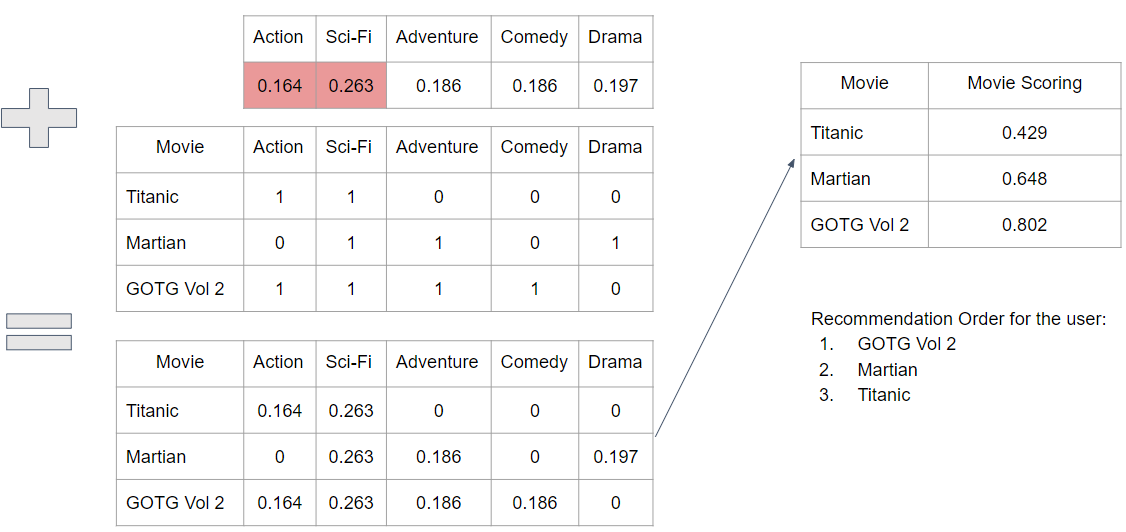

In [11]:
movies = ["Titanic",'Martian','GOTG Vol 2']
action = [1,0,1]
scifi = [1,1,1]
adventure = [0,1,1]
comedy = [0,0,1]
drama = [0,1,0]

df_movies_recommendation = pd.DataFrame({
    'movie':movies,
    'Action':action,
    'Sci-Fi':scifi,
    'Adventure':adventure,
    'Comedy':comedy,
    'Drama':drama
})

df_movies_recommendation

,movie,Action,Sci-Fi,Adventure,Comedy,Drama
0,Titanic,1,1,0,0,0
1,Martian,0,1,1,0,1
2,GOTG Vol 2,1,1,1,1,0


In [12]:
movie_scoring

Action       0.164835
Sci-Fi       0.263736
Adventure    0.186813
Comedy       0.186813
Drama        0.197802
dtype: float64

In [13]:
for i in ['Action','Sci-Fi','Adventure','Comedy','Drama']:
  df_movies_recommendation[i] = df_movies_recommendation[i]*movie_scoring[i]

df_movies_recommendation['movie rating prediction'] = df_movies_recommendation.sum(axis = 1)
df_movies_recommendation

,movie,Action,Sci-Fi,Adventure,Comedy,Drama,movie rating prediction
0,Titanic,0.164835,0.263736,0.000000,0.000000,0.000000,0.428571
1,Martian,0.000000,0.263736,0.186813,0.000000,0.197802,0.648352
2,GOTG Vol 2,0.164835,0.263736,0.186813,0.186813,0.000000,0.802198


Recommendation Order for the user:
- GOTG Vol 2
- Martian
- Titanic

> ## Content Based Filtering Multiple User

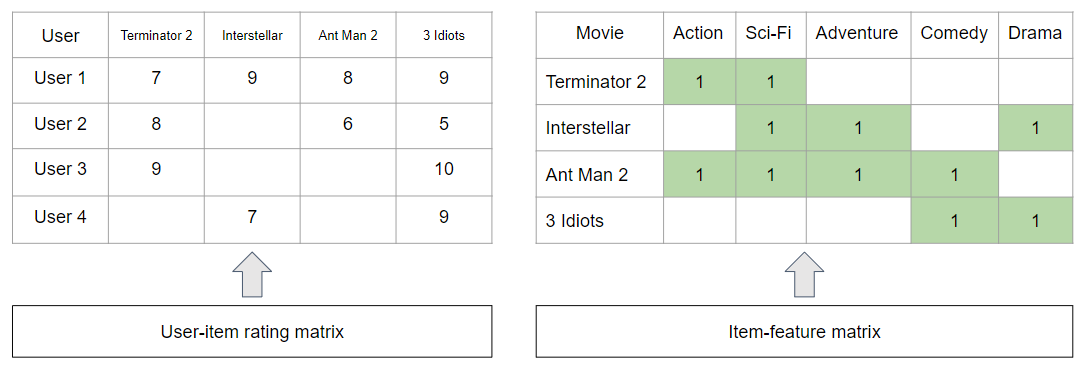

In [14]:
import pandas as pd
import numpy as np

In [15]:
movies = ["Terminator 2","Interstellar","Ant Man 2","3 Idiots"]
action = [1,0,1,0]
scifi = [1,1,1,0]
adventure = [0,1,1,0]
comedy = [0,0,1,1]
drama = [0,1,0,1]

df_item_features = pd.DataFrame({
    'movie':movies,
    'Action':action,
    'Sci-Fi':scifi,
    'Adventure':adventure,
    'Comedy':comedy,
    'Drama':drama
})

df_item_features

,movie,Action,Sci-Fi,Adventure,Comedy,Drama
0,Terminator 2,1,1,0,0,0
1,Interstellar,0,1,1,0,1
2,Ant Man 2,1,1,1,1,0
3,3 Idiots,0,0,0,1,1


In [16]:
user = ['user 1','user 2','user 3','user 4']
terminator_2 = [7,8,9,0]
interstellar = [9,0,0,7]
ant_man_2 = [8,6,0,0]
three_idiots = [9,5,10,9]

df_user_items = pd.DataFrame({
    'user':user,
    'Terminator 2':terminator_2,
    'Interstellar':interstellar,
    'Ant Man 2':ant_man_2,
    '3 Idiots':three_idiots
})

df_user_items

,user,Terminator 2,Interstellar,Ant Man 2,3 Idiots
0,user 1,7,9,8,9
1,user 2,8,0,6,5
2,user 3,9,0,0,10
3,user 4,0,7,0,9


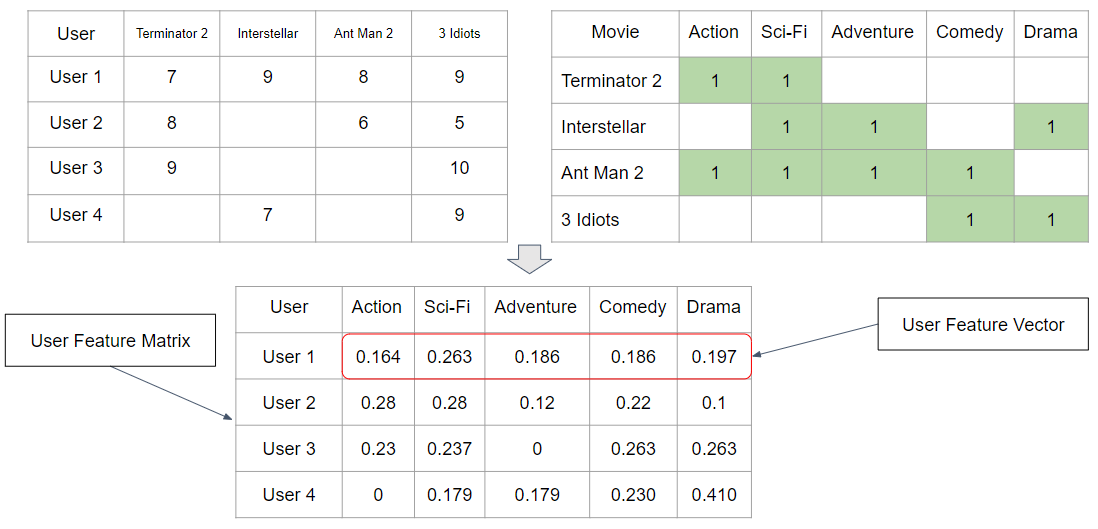

In [17]:
arr_user_items = np.array(df_user_items.drop('user', axis = 1))
arr_item_features = np.array(df_item_features.drop('movie', axis = 1))

n_user = arr_user_items.shape[0]
n_item = arr_user_items.shape[1]
n_feature = arr_item_features.shape[1]

arr_user_items_score = np.empty((n_user,n_item))
arr_user_feature = np.empty((n_user,n_feature))

for i in range(0,n_user):
  # print(arr_user_items[i,:])
  user_feature = np.matmul(arr_user_items[i,:],arr_item_features)
  # print(user_feature)
  user_feature = user_feature/user_feature.sum()
  arr_user_feature[i,:] = user_feature

In [18]:
df_user_feature = pd.DataFrame(arr_user_feature)
df_user_feature.columns = df_item_features.columns[1:]
df_user_feature.index = user
df_user_feature

,Action,Sci-Fi,Adventure,Comedy,Drama
user 1,0.164835,0.263736,0.186813,0.186813,0.197802
user 2,0.280000,0.280000,0.120000,0.220000,0.100000
user 3,0.236842,0.236842,0.000000,0.263158,0.263158
user 4,0.000000,0.179487,0.179487,0.230769,0.410256


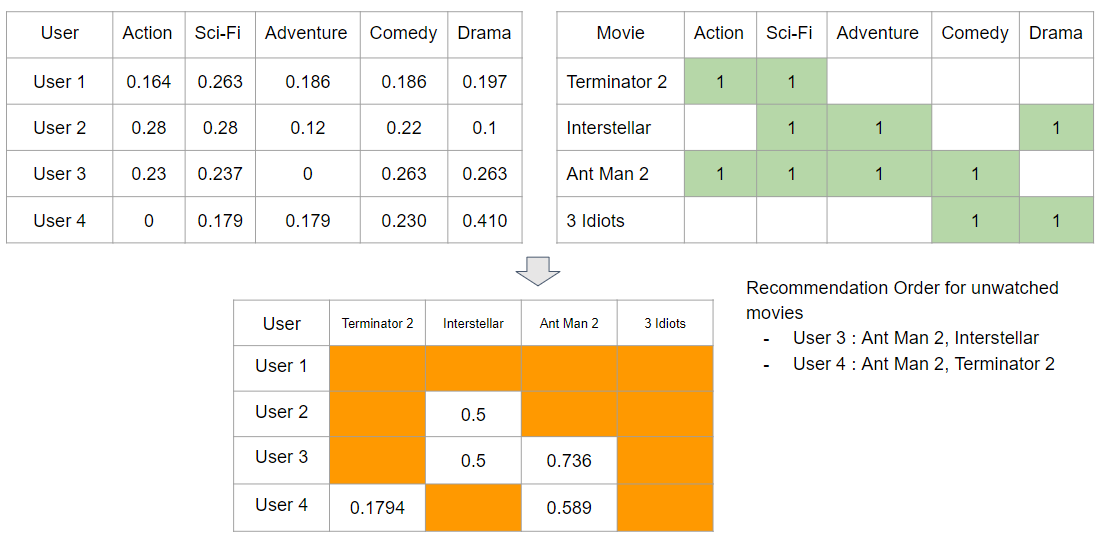

In [19]:
for i in range(0, n_user):
  user_item_score = np.matmul(arr_item_features,arr_user_feature[i,:])
  arr_user_items_score[i,:] = user_item_score

arr_user_items_score_unwatched = np.where(arr_user_items == 0,arr_user_items_score,0)

df_user_items_score_unwatched = pd.DataFrame(arr_user_items_score_unwatched)
df_user_items_score_unwatched.columns = movies
df_user_items_score_unwatched.index = user
df_user_items_score_unwatched

,Terminator 2,Interstellar,Ant Man 2,3 Idiots
user 1,0.000000,0.0,0.000000,0.0
user 2,0.000000,0.5,0.000000,0.0
user 3,0.000000,0.5,0.736842,0.0
user 4,0.179487,0.0,0.589744,0.0


Recommendation Order for unwatched movies
- User 3 : Ant Man 2, Interstellar
- User 4 : Ant Man 2, Terminator 2


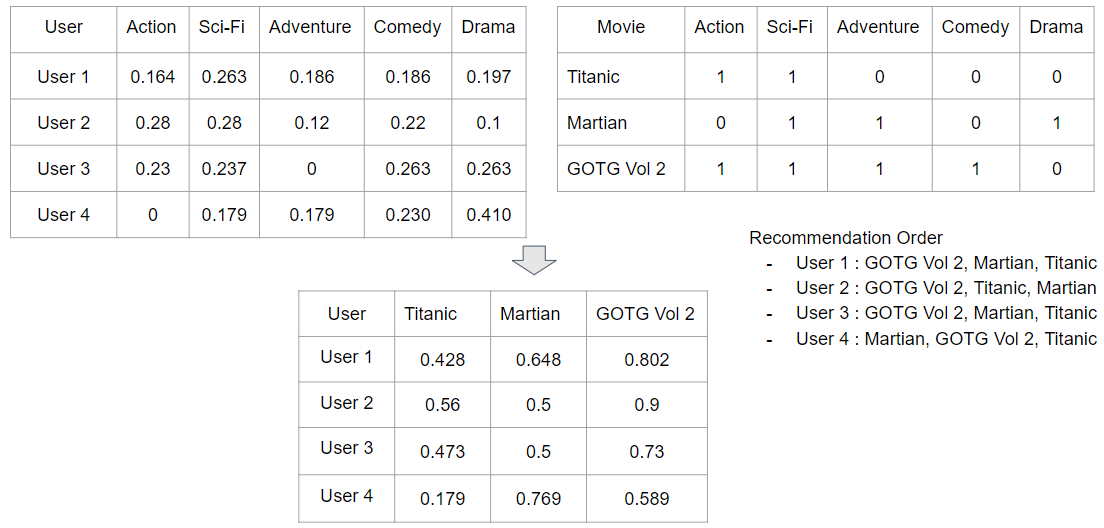

In [20]:
movies = ["Titanic","Martian","GOTG Vol 2"]
action = [1,0,1]
scifi = [1,1,1]
adventure = [0,1,1]
comedy = [0,0,1]
drama = [0,1,0]

df_item_features_new = pd.DataFrame({
    'movie':movies,
    'Action':action,
    'Sci-Fi':scifi,
    'Adventure':adventure,
    'Comedy':comedy,
    'Drama':drama
})

df_item_features_new

,movie,Action,Sci-Fi,Adventure,Comedy,Drama
0,Titanic,1,1,0,0,0
1,Martian,0,1,1,0,1
2,GOTG Vol 2,1,1,1,1,0


In [21]:
arr_item_features_new = np.array(df_item_features_new.drop('movie', axis = 1))

n_item_new = df_item_features_new.shape[0]

arr_user_items_score_new = np.empty((n_user,n_item_new))

for i in range(0, n_user):
  user_item_score = np.matmul(arr_item_features_new,arr_user_feature[i,:])
  arr_user_items_score_new[i,:] = user_item_score

df_user_items_score_new = pd.DataFrame(arr_user_items_score_new)
df_user_items_score_new.index = user
df_user_items_score_new.columns = df_item_features_new['movie']
df_user_items_score_new

movie,Titanic,Martian,GOTG Vol 2
user 1,0.428571,0.648352,0.802198
user 2,0.560000,0.500000,0.900000
user 3,0.473684,0.500000,0.736842
user 4,0.179487,0.769231,0.589744


Recommendation Order
- User 1 : GOTG Vol 2, Martian, Titanic
- User 2 : GOTG Vol 2, Titanic, Martian
- User 3 : GOTG Vol 2, Martian, Titanic
- User 4 : Martian, GOTG Vol 2, Titanic

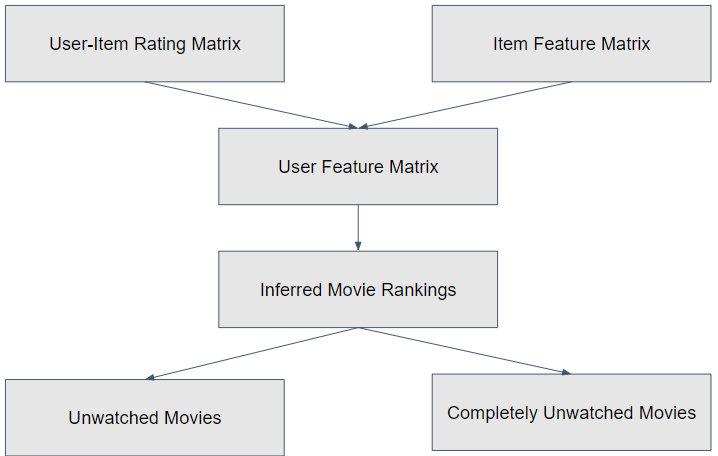

# Collaborative Filtering : Model Based

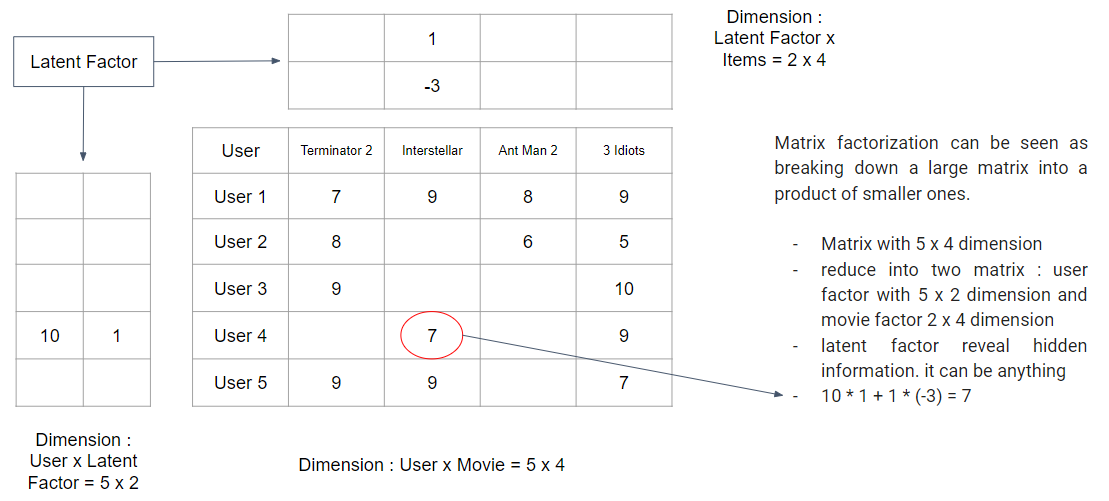

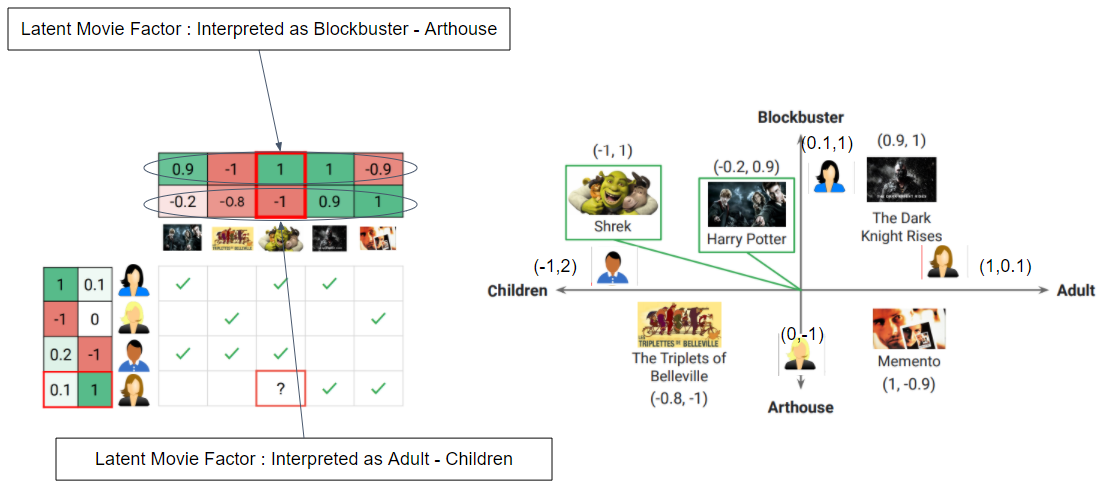

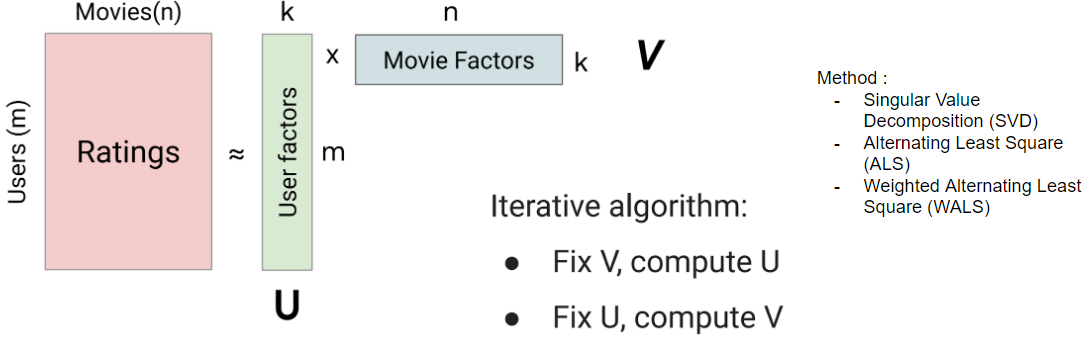

> ## Library

In [22]:
# !pip install scikit-surprise

In [23]:
import pandas as pd

import seaborn as sns

from surprise import Reader
from surprise import Dataset

from surprise import SVD
from surprise import BaselineOnly

from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import GridSearchCV

> ## Data

In [24]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [25]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [26]:
user_item_rating_matrix = df.pivot_table(values = 'rating', index = 'user_id', columns = 'item_id')

In [27]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['user_id','item_id','rating']], reader)

In [28]:
data.df.head(10)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
5,22,377,1
6,244,51,2
7,166,346,1
8,298,474,4
9,115,265,2


> ## Validation

Data Splitting

In [29]:
trainset, testset = train_test_split(data, test_size=0.25,random_state=101)

Algo 1 : SVD

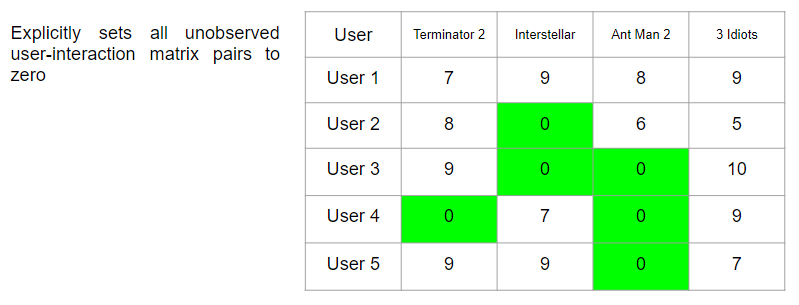

In [30]:
algo = SVD()

algo.fit(trainset)
predictions = algo.test(testset)

In [31]:
accuracy.rmse(predictions)

RMSE: 0.9362


0.9362378289242176

Algo 2 : ALS

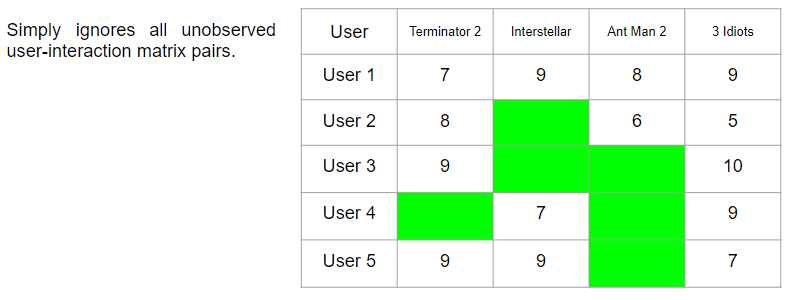

In [32]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)

algo.fit(trainset)
predictions = algo.test(testset)

Estimating biases using als...


In [33]:
accuracy.rmse(predictions)

RMSE: 0.9409


0.9408558035131163

Based on train-test validation, SVD is better than ALS

> ## Cross Validation

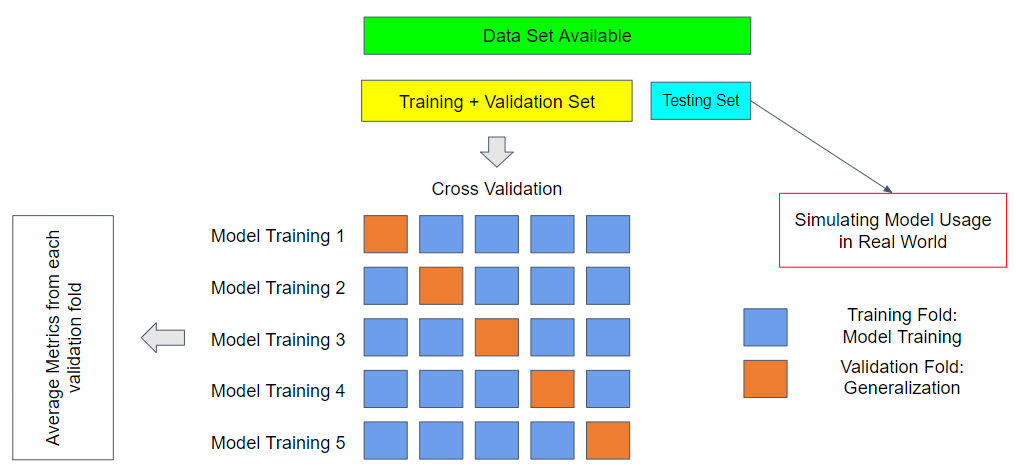

Algo 1 : SVD

In [34]:
algo = SVD()

cv_svd = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9379  0.9337  0.9402  0.9328  0.9445  0.9378  0.0043  
MAE (testset)     0.7413  0.7378  0.7393  0.7354  0.7462  0.7400  0.0037  
Fit time          3.57    3.57    3.58    3.58    3.78    3.62    0.08    
Test time         0.09    0.14    0.09    0.09    0.24    0.13    0.06    


In [35]:
print('rmse cv mean',cv_svd['test_rmse'].mean())

rmse cv mean 0.9377909474910057


Algo 2 : ALS

In [36]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

algo = BaselineOnly(bsl_options=bsl_options)

cv_als = cross_validate(algo, data, measures=['RMSE','MAE'], cv=5, verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [37]:
print('rmse cv mean',cv_als['test_rmse'].mean())

rmse cv mean 0.9412819598360326


Based on cross validation, SVD is better than ALS

> ## Hyperparameter Tuning

We optimize SVD further using hyperparameter tuning

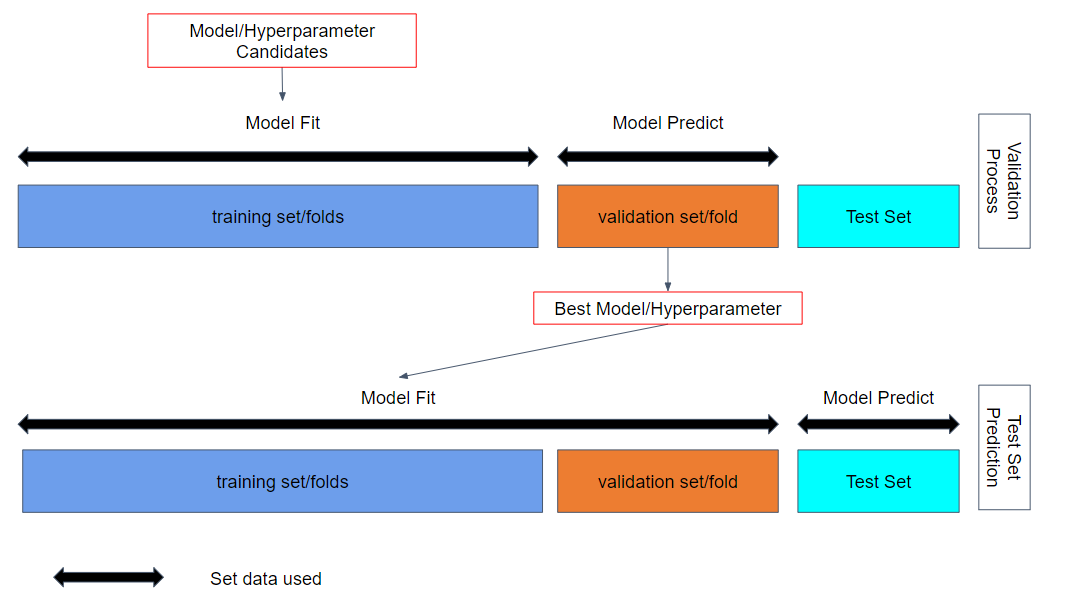

In [38]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

best score and best hyperparameter

In [39]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9642356528274969
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [40]:
print(gs.best_score['mae'])
print(gs.best_params['mae'])

0.7731457914339299
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


> ## Prediction Result

We will reccommend item 565, 647, 665, and 677 to users 0, 111 and 212.

In [41]:
df_test = pd.DataFrame(columns = ['user_id','item_id'])

for i in [0,111,212]:
    for j in [647, 665, 565, 677]:
        df_test = df_test.append({'user_id':i,'item_id':j},ignore_index = True)
        
df_test

,user_id,item_id
0,0,647
1,0,665
2,0,565
3,0,677
4,111,647
5,111,665
6,111,565
7,111,677
8,212,647
9,212,665


Build the final model using SVD with following hyperparameter, n_epochs = {5, 10}, lr_all = {0.002, 0.005}, reg_all = {0.4, 0.6}

In [42]:
algo = SVD(n_epochs = 10, lr_all = 0.005, reg_all = 0.4)
algo.fit(trainset)

y = []

for _, row in df_test.iterrows():
    est = algo.predict(row.user_id, row.item_id)
    y.append(est[3])
    
df_test['rating'] = y

df_test.sort_values(by = ['user_id','rating'], ascending = [True,False], inplace = True)

USER ID - 0

In [43]:
df_test[df_test['user_id'] == 0]

,user_id,item_id,rating
0,0,647,4.066441
3,0,677,3.458439
1,0,665,3.005746
2,0,565,3.003746


recommendation order for user 0 : 647, 677, 665, 565

USER ID - 111

In [44]:
df_test[df_test['user_id'] == 111]

,user_id,item_id,rating
4,111,647,3.944677
7,111,677,3.337471
6,111,565,3.026948
5,111,665,2.986384


recommendation order for user 0 : 647, 677, 565, 665

USER ID - 212

In [45]:
df_test[df_test['user_id'] == 212]

,user_id,item_id,rating
8,212,647,3.829378
11,212,677,3.313238
10,212,565,2.946326
9,212,665,2.900204


recommendation order for user 0 : 647, 677, 565, 665